## Name: Batyrkhan Taldybayev
## Date: 20.04.2025
## Group: IT3-2203
---
## Importing Libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import NMF
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [18]:
data = pd.read_csv("student.csv")
data

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [19]:
categorical_columns = [
    "Parental_Involvement", "Access_to_Resources", "Extracurricular_Activities",
    "Motivation_Level", "Learning_Disabilities", "Internet_Access", "Family_Income", "Teacher_Quality", "School_Type",
    "Peer_Influence", "Parental_Education_Level", "Distance_from_Home", "Gender"
]

le = LabelEncoder()
data[categorical_columns] = data[categorical_columns].apply(le.fit_transform)

data

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,0,0,7,73,1,1,0,1,2,1,2,3,0,1,2,1,67
1,19,64,1,2,0,8,59,1,1,2,2,2,1,0,4,0,0,1,0,61
2,24,98,2,2,1,7,91,2,1,2,2,2,1,1,4,0,2,2,1,74
3,29,89,1,2,1,8,98,2,1,1,2,2,1,0,4,0,1,1,1,71
4,19,92,2,2,1,6,65,2,1,3,2,0,1,1,4,0,0,2,0,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,0,2,0,7,76,2,1,1,0,2,1,2,2,0,1,2,0,68
6603,23,76,0,2,0,8,81,2,1,3,1,0,1,2,2,0,1,2,0,69
6604,20,90,2,1,1,6,65,1,1,3,1,2,1,0,2,0,2,2,0,68
6605,10,86,0,0,1,6,91,0,1,2,1,2,0,2,3,0,1,0,0,68


In [20]:
X = data.drop("Exam_Score", axis=1)
y = data["Exam_Score"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
sse = []
sil_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_scaled, kmeans.labels_))

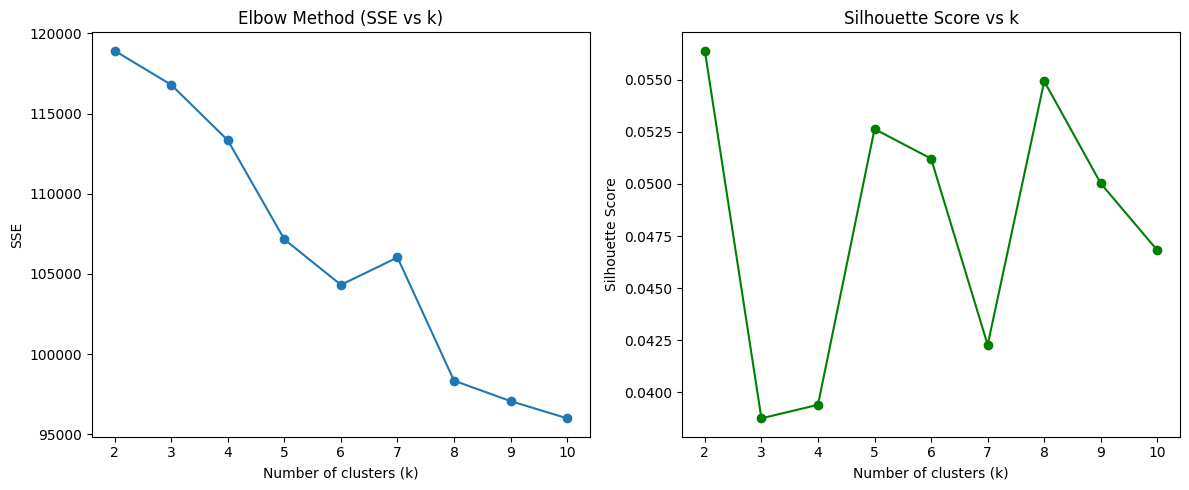

In [22]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K, sse, marker='o')
plt.title('SSE vs k')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

plt.subplot(1, 2, 2)
plt.plot(K, sil_scores, marker='o', color='green')
plt.title('Silhouette Score vs k')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.tight_layout()
plt.show()


In [23]:
best_k = sil_scores.index(max(sil_scores)) + 2
print(f"Best K: {best_k}")

kmeans = KMeans(n_clusters=best_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

Best K (based on silhouette): 2


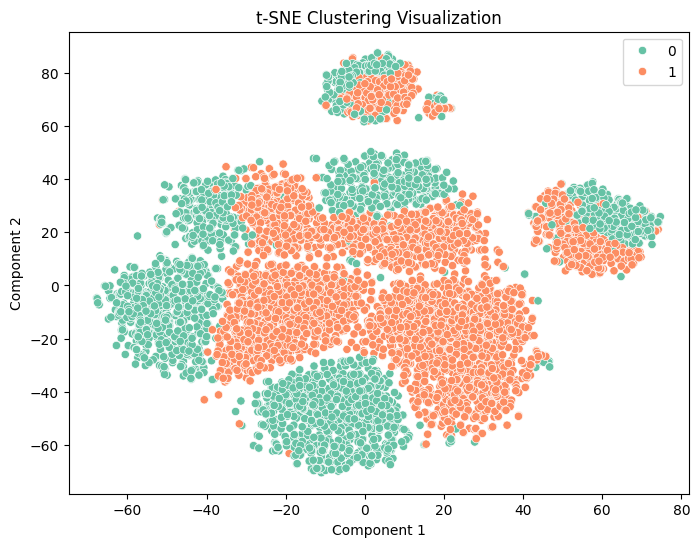

In [24]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=clusters, palette="Set2")
plt.title("t-SNE Clustering Visualization")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

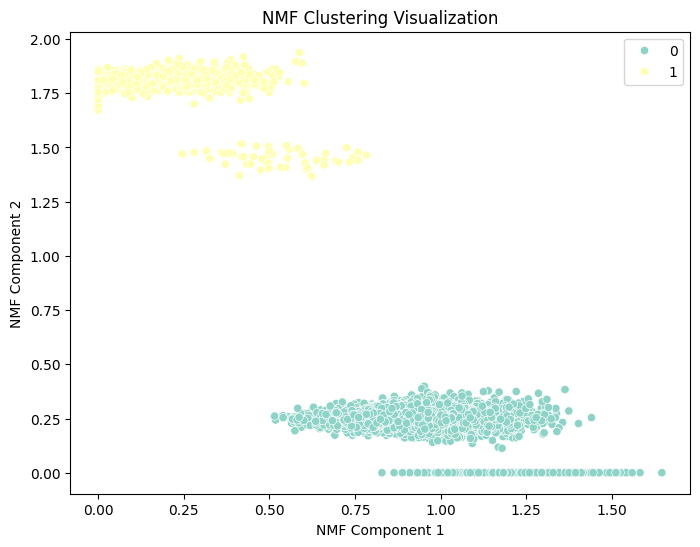

In [25]:
nmf = NMF(n_components=best_k, init='random', random_state=42)
X_nmf = nmf.fit_transform(np.abs(X_scaled))

kmeans_nmf = KMeans(n_clusters=best_k, random_state=42)
clusters_nmf = kmeans_nmf.fit_predict(X_nmf)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_nmf[:, 0], y=X_nmf[:, 1], hue=clusters_nmf, palette="Set3")
plt.title("NMF Clustering Visualization")
plt.xlabel("NMF Component 1")
plt.ylabel("NMF Component 2")
plt.show()

In [26]:
tsne_sil = silhouette_score(X_tsne, clusters)
nmf_sil = silhouette_score(X_nmf, clusters_nmf)
original_sil = silhouette_score(X_scaled, clusters)

print(f"Silhouette Score (Original): {original_sil:.4f}")
print(f"Silhouette Score (t-SNE): {tsne_sil:.4f}")
print(f"Silhouette Score (NMF): {nmf_sil:.4f}")

Silhouette Score (Original): 0.0564
Silhouette Score (t-SNE): 0.1176
Silhouette Score (NMF): 0.8844
